In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [4]:
pip install  pyngrok

In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
added 22 packages in 2s
⠸
⠸3 packages are looking for funding
⠸  run `npm fund` for details
⠸

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/anomaly_files/Training_data/all_faults.csv')

In [ ]:
df

,DE_data,fault
0,0.010016,7_IR
1,-0.023788,7_IR
2,-0.007929,7_IR
3,0.078876,7_IR
4,0.202824,7_IR
...,...,...
2782624,-0.059664,N
2782625,-0.063836,N
2782626,-0.034630,N
2782627,0.016689,N


In [ ]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 121.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
win_len=500
stride=300

x=[]
y=[]
for k in df['fault'].unique():
  df_temp2=df[df['fault']==k]
  for i in np.arange(0,len(df_temp2)-(win_len),stride):
    temp=df_temp2.iloc[i:i+win_len,:-1].values
    temp=temp.reshape((1,-1))
    x.append(temp)
    y.append(df_temp2.iloc[i+win_len,-1])

x=np.array(x)
x=x.reshape((x.shape[0],-1,1))

y=np.array(y)
encoder=LabelEncoder()
encoder.fit(y)
encoded_y=encoder.transform(y)
OHE_y=to_categorical(encoded_y)

In [ ]:
x.shape

(9259, 500, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,OHE_y,test_size=0.3,shuffle=True)

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Conv2D,MaxPooling2D
from tensorflow.keras.utils import plot_model

from tensorflow.keras.layers import concatenate

import tensorflow
tensorflow.config.run_functions_eagerly(True)

no_classes=len(df['fault'].unique())

#head 1
inputs1 = Input (shape=(x.shape[1], x.shape[2]))
conv1 = Conv1D(filters=64, kernel_size=200, activation="relu")(inputs1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=20)(drop1) # Changed pooll to pool1
flat1 = Flatten()(pool1)

#head 2
inputs2 = Input(shape=(x.shape[1], x.shape[2]))
conv2 = Conv1D(filters=64, kernel_size=100, activation='relu')(inputs2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=10)(drop2)
flat2 = Flatten()(pool2) # Changed poo12 to pool2

#head 3
inputs3 = Input(shape=(x.shape[1], x.shape[2]))
conv3 = Conv1D(filters=64, kernel_size=50, activation="relu")(inputs3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=5)(drop3) # Changed MaxPooling10 to MaxPooling1D
flat3 = Flatten()(pool3)

#merge
merged = concatenate ([flat1, flat2, flat3])

#interpretation
densel = Dense(100, activation='relu') (merged)
outputs = Dense(no_classes, activation='softmax') (densel)
cnn_model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 500, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 500, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_4             │ (None, 500, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 301, 64)        │         12,864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 401, 64)        │          6,464 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 451, 64)        │          3,264 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 301, 64)        │              0 │ conv1d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 401, 64)        │              0 │ conv1d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 451, 64)        │              0 │ conv1d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 15, 64)         │              0 │ dropout_2[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 40, 64)         │              0 │ dropout_3[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 90, 64)         │              0 │ dropout_4[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 960)            │              0 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 2560)           │              0 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 5760)           │              0 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 9280)           │              0 │ flatten_2[0][0],       │
│                           │                        │                │ flatten_3[0][0],       │
│                      

 Total params: 952,106 (3.63 MB)

 Trainable params: 952,106 (3.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size=100
epochs=10
history=cnn_model.fit([x_train,x_train,x_train],y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=([x_test,x_test,x_test],y_test),shuffle=True)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 32s 493ms/step - accuracy: 0.4380 - loss: 1.6440 - val_accuracy: 0.8661 - val_loss: 0.5370
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 32s 496ms/step - accuracy: 0.9238 - loss: 0.2423 - val_accuracy: 0.9554 - val_loss: 0.2750
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 32s 486ms/step - accuracy: 0.9680 - loss: 0.1129 - val_accuracy: 0.9795 - val_loss: 0.1664
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 32s 488ms/step - accuracy: 0.9883 - loss: 0.0502 - val_accuracy: 0.9881 - val_loss: 0.1187
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 32s 486ms/step - accuracy: 0.9940 - loss: 0.0297 - val_accuracy: 0.9921 - val_loss: 0.0896
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 32s 490ms/step - accuracy: 0.9961 - loss: 0.0235 - val_accuracy: 0.9665 - val_loss: 0.2554
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 31s 482ms/step - accuracy: 0.9787 - loss: 0.1017 - val_accuracy: 0.9870 - val_loss: 0.0950
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 31s 483ms/step - accuracy: 0.9919 - loss: 0.0300 - val_accuracy: 0.986

 2/87 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


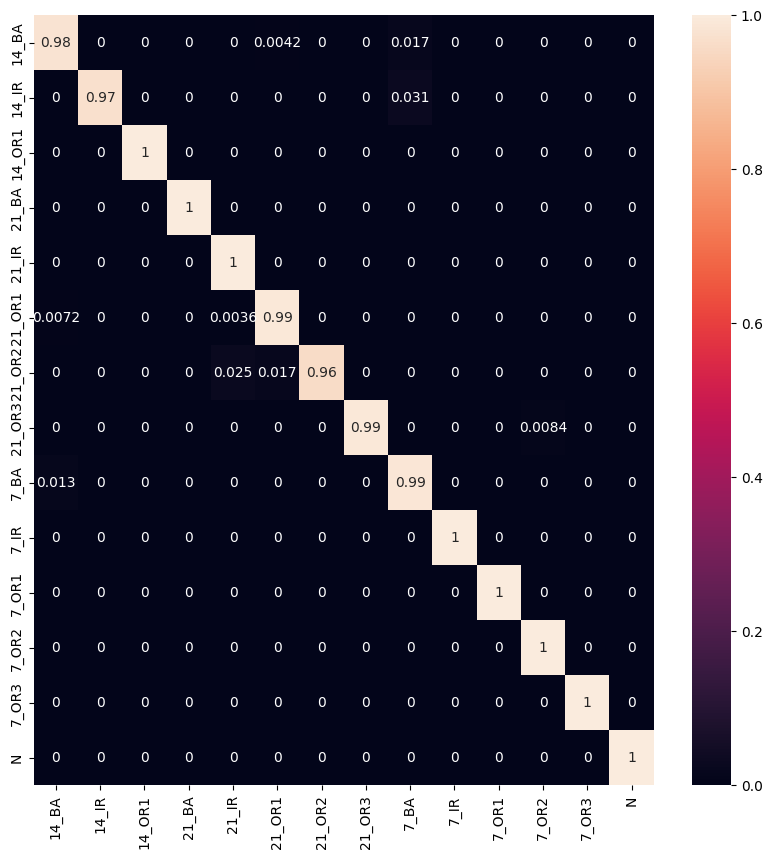

In [ ]:
def inv_Transform_result(y_pred):
    # Return the original one-hot encoded format instead of class labels
    return y_pred

y_pred=cnn_model.predict([x_test,x_test,x_test])

# No need to apply inv_Transform_result here

from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(10,10))

# Get predicted labels from probabilities
y_pred_labels = y_pred.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

# Compute confusion matrix using predicted and true labels
cm = confusion_matrix(y_test_labels,y_pred_labels,normalize='true')

# Get class labels for plotting
class_labels = encoder.classes_

f = sns.heatmap(cm, annot=True,xticklabels=class_labels,yticklabels=class_labels)
plt.show()

In [ ]:
# Create the dummy model to extract features from the second-to-last layer
dummy_cnn = Model(inputs=cnn_model.input,outputs=cnn_model.layers[16].output)
# Extract features for t-SNE
y_viz = dummy_cnn.predict([x_train,x_train,x_train])

  4/203 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step


In [ ]:
y_viz.shape

(6481, 100)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6481 samples in 0.001s...
[t-SNE] Computed neighbors for 6481 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6481
[t-SNE] Computed conditional probabilities for sample 2000 / 6481
[t-SNE] Computed conditional probabilities for sample 3000 / 6481
[t-SNE] Computed conditional probabilities for sample 4000 / 6481
[t-SNE] Computed conditional probabilities for sample 5000 / 6481
[t-SNE] Computed conditional probabilities for sample 6000 / 6481
[t-SNE] Computed conditional probabilities for sample 6481 / 6481
[t-SNE] Mean sigma: 1.702428
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.889160
[t-SNE] KL divergence after 300 iterations: 1.813739


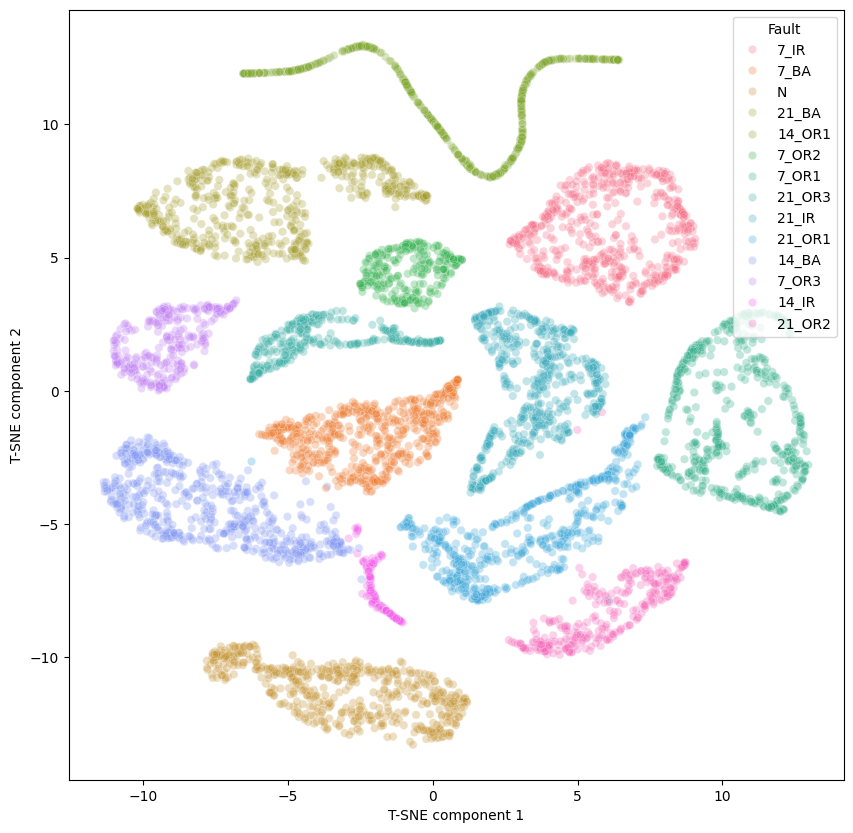

In [ ]:
from sklearn.manifold import TSNE

X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

# Decode one-hot encoded y_train to original labels
tSNEdf['Fault'] = encoder.inverse_transform(y_train.argmax(axis=1))

# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

In [ ]:
cnn_model.save('/content/drive/MyDrive/anomaly_files/CNN/cnn_fault_detection.keras')
import joblib
joblib.dump(encoder, '/content/drive/MyDrive/anomaly_files/CNN/label_encoder_cnn.joblib')

['/content/drive/MyDrive/anomaly_files/CNN/label_encoder.joblib']

# Fault classification

In [ ]:
%%writefile /content/drive/MyDrive/anomaly_files/app.py
import streamlit as st
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load models and encoders
cnn_model = load_model('/content/drive/MyDrive/anomaly_files/CNN/cnn_fault_detection.keras')
cnn_encoder = joblib.load('/content/drive/MyDrive/anomaly_files/CNN/label_encoder.joblib')

ann_model = load_model('/content/drive/MyDrive/anomaly_files/ANN/fault_detection_model.h5')
ann_encoder = joblib.load('/content/drive/MyDrive/anomaly_files/ANN/label_encoder.joblib')

# Signal segmentation function
def segment_signal(signal, win_len, stride=200):
    if len(signal) < win_len:
        return None
    return np.array([signal[i:i + win_len] for i in range(0, len(signal) - win_len + 1, stride)])

# Streamlit app
st.title("Anomaly Detection App")
st.write("Upload a CSV file with a single column of vibration data (minimum 1000 points):")

uploaded_file = st.file_uploader("Choose a CSV", type="csv")

if uploaded_file:
    df = pd.read_csv(uploaded_file, header=None)

    if df.shape[1] != 1:
        st.error("CSV must have exactly one column.")
    else:
        signal = df.iloc[:, 0].values
        st.write(f"Loaded signal length: {len(signal)} points.")

        col1, col2 = st.columns(2)

        # CNN Prediction
        with col1:
            st.header("CNN Model")
            cnn_windows = segment_signal(signal, win_len=500)

            if cnn_windows is None:
                st.error("Signal too short for CNN (needs ≥500 points).")
            else:
                preds_cnn = cnn_model.predict([cnn_windows]*3)
                pred_classes_cnn = np.argmax(preds_cnn, axis=1)
                faults_cnn = cnn_encoder.inverse_transform(pred_classes_cnn)
                fault_cnn, counts_cnn = np.unique(faults_cnn, return_counts=True)
                dist_cnn = pd.DataFrame({
                    'Fault': fault_cnn,
                    'Percentage': [f'{c/len(faults_cnn)*100:.2f}%' for c in counts_cnn]
                })
                top_fault_cnn = fault_cnn[np.argmax(counts_cnn)]
                conf_cnn = np.mean(np.max(preds_cnn[faults_cnn == top_fault_cnn], axis=1)) * 100

                st.write(f"Predicted Fault: **{top_fault_cnn}**")
                st.table(dist_cnn)
                st.write(f"Avg Confidence: {conf_cnn:.2f}%")

        # ANN Prediction
        with col2:
            st.header("ANN Model")
            ann_windows = segment_signal(signal, win_len=1000)

            if ann_windows is None:
                st.error("Signal too short for ANN (needs ≥1000 points).")
            else:
                preds_ann = ann_model.predict(ann_windows)
                pred_classes_ann = np.argmax(preds_ann, axis=1)
                faults_ann = ann_encoder.inverse_transform(pred_classes_ann)
                fault_ann, counts_ann = np.unique(faults_ann, return_counts=True)
                dist_ann = pd.DataFrame({
                    'Fault': fault_ann,
                    'Percentage': [f'{c/len(faults_ann)*100:.2f}%' for c in counts_ann]
                })
                top_fault_ann = fault_ann[np.argmax(counts_ann)]
                conf_ann = np.mean(np.max(preds_ann[faults_ann == top_fault_ann], axis=1)) * 100

                st.write(f"Predicted Fault: **{top_fault_ann}**")
                st.table(dist_ann)
                st.write(f"Avg Confidence: {conf_ann:.2f}%")
else:
    st.info("Please upload a CSV file to begin analysis.")

Overwriting /content/drive/MyDrive/anomaly_files/app.py


# Anomaly Detection

In [8]:
%%writefile /content/drive/MyDrive/anomaly_files/app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import joblib
import matplotlib.pyplot as plt

# Load all models and encoders
@st.cache_resource
def load_all_models():
    # LSTM Autoencoder models
    lstm_model = load_model('/content/drive/MyDrive/anomaly_files/LSTM/lstm_autoencoder_anomaly_detection.h5')
    lstm_scaler = joblib.load('/content/drive/MyDrive/anomaly_files/LSTM/standard_scaler.save')

    # CNN Fault Detection models
    cnn_model = load_model('/content/drive/MyDrive/anomaly_files/CNN/cnn_fault_detection.keras')
    cnn_encoder = joblib.load('/content/drive/MyDrive/anomaly_files/CNN/label_encoder_cnn.joblib')

    # ANN Fault Detection models
    ann_model = load_model('/content/drive/MyDrive/anomaly_files/ANN/fault_detection_model.h5')
    ann_encoder = joblib.load('/content/drive/MyDrive/anomaly_files/ANN/label_encoder_aan.joblib')

    return lstm_model, lstm_scaler, cnn_model, cnn_encoder, ann_model, ann_encoder

# Load all models
lstm_model, lstm_scaler, cnn_model, cnn_encoder, ann_model, ann_encoder = load_all_models()

# Signal segmentation function
def segment_signal(signal, win_len, stride=200):
    if len(signal) < win_len:
        return None
    return np.array([signal[i:i + win_len] for i in range(0, len(signal) - win_len + 1, stride)])

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

# Function to calculate reconstruction error
def calculate_reconstruction_error(model, data):
    predictions = model.predict(data)
    mse = np.mean(np.power(data - predictions, 2), axis=1)
    return mse

# Streamlit app
def main():
    st.title("Anomaly Detection & Fault Classification System")
    st.write("Upload a CSV file containing vibration data for analysis")

    # File upload
    uploaded_file = st.file_uploader("Choose a CSV file", type="csv")

    if uploaded_file is not None:
        try:
            # Read the uploaded file
            df = pd.read_csv(uploaded_file)
            st.success("File successfully loaded!")

            # Automatically select first numeric column
            numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

            if not numeric_cols:
                st.error("No numeric columns found in the CSV file")
                return

            selected_col = numeric_cols[0]
            st.write(f"Analyzing")

            # ========== ANOMALY DETECTION SECTION ==========
            st.header("Step 1: Anomaly Detection")

            # Preprocess the data
            X = df[selected_col].values.reshape(-1, 1)
            X_scaled = lstm_scaler.transform(X)

            # Create sequences
            SEQ_LENGTH = 30
            X_sequences = create_sequences(X_scaled, SEQ_LENGTH)

            if len(X_sequences) == 0:
                st.error(f"Not enough data points to create sequences. Need at least {SEQ_LENGTH} data points.")
                return

            # Calculate reconstruction error
            with st.spinner('Detecting anomalies...'):
                errors = calculate_reconstruction_error(lstm_model, X_sequences)

            # Determine threshold
            threshold = np.percentile(errors, 85)


            # Detect anomalies
            anomalies = errors > threshold

            # Display results
            st.subheader("Anomaly Detection Results")

            # Plot results
            fig, ax = plt.subplots(figsize=(10, 4))
            normal_indices = np.where(~anomalies)[0]
            anomaly_indices = np.where(anomalies)[0]

            ax.plot(normal_indices, errors[normal_indices], 'bo', markersize=3, label='Normal')
            if len(anomaly_indices) > 0:
                ax.plot(anomaly_indices, errors[anomaly_indices], 'ro', markersize=5, label='Anomaly')
            ax.axhline(y=threshold, color='r', linestyle='-', label='Threshold')
            ax.set_title(f'Anomaly Detection Results')
            ax.set_ylabel('Reconstruction Error')
            ax.set_xlabel('Sample Index')
            ax.legend()

            st.pyplot(fig)

            # Summary statistics
            st.write(f"Total samples analyzed: {len(X_sequences)}")
            st.write(f"Number of anomalies detected: {np.sum(anomalies)}")
            st.write(f"Anomaly threshold (85th percentile): {threshold:.4f}")

            # Show anomalies in a table
            if np.sum(anomalies) > 0:
                # Create a dataframe with the original data points marked as anomalies
                result_df = df.copy()
                result_df.columns=['Vibration']
                result_df['Anomaly'] = False
                result_df['Reconstruction_Error'] = np.nan

                # Assign errors to the last point of each sequence
                for idx in range(len(errors)):
                    pos = idx + SEQ_LENGTH - 1
                    if pos < len(result_df):
                        result_df.loc[pos, 'Reconstruction_Error'] = errors[idx]
                        result_df.loc[pos, 'Anomaly'] = anomalies[idx]

                anomaly_df = result_df[result_df['Anomaly'] == True]
                st.subheader("Detected Anomalies")
                st.write(anomaly_df)

                # ========== FAULT CLASSIFICATION SECTION ==========
                st.header("Step 2: Fault Classification")

                if st.button("Classify Detected Anomalies"):
                    with st.spinner('Classifying anomalies...'):
                        # Prepare anomaly segments for classification
                        anomaly_segments = []
                        for idx in anomaly_indices:
                            start_idx = max(0, idx - 500)  # Get 500 points before anomaly
                            end_idx = min(len(X), idx + 500)  # Get 500 points after anomaly
                            segment = X[start_idx:end_idx]
                            anomaly_segments.append(segment)

                        # CNN Classification
                        st.subheader("CNN Model Classification")
                        cnn_predictions = []
                        for seg in anomaly_segments:
                            cnn_windows = segment_signal(seg, win_len=500)
                            if cnn_windows is not None and len(cnn_windows) > 0:
                                preds = cnn_model.predict([cnn_windows]*3)
                                pred_class = np.argmax(preds, axis=1)
                                faults = cnn_encoder.inverse_transform(pred_class)
                                cnn_predictions.extend(faults)

                        if cnn_predictions:
                            fault_types, counts = np.unique(cnn_predictions, return_counts=True)
                            cnn_results = pd.DataFrame({
                                'Fault Type': fault_types,
                                'Count': counts,
                                'Percentage': [f'{c/len(cnn_predictions)*100:.1f}%' for c in counts]
                            })
                            st.table(cnn_results)
                        else:
                            st.warning("CNN couldn't process any anomaly segments")

                        # ANN Classification
                        st.subheader("ANN Model Classification")
                        ann_predictions = []
                        for seg in anomaly_segments:
                            ann_windows = segment_signal(seg, win_len=1000)
                            if ann_windows is not None and len(ann_windows) > 0:
                                preds = ann_model.predict(ann_windows)
                                pred_class = np.argmax(preds, axis=1)
                                faults = ann_encoder.inverse_transform(pred_class)
                                ann_predictions.extend(faults)

                        if ann_predictions:
                            fault_types, counts = np.unique(ann_predictions, return_counts=True)
                            ann_results = pd.DataFrame({
                                'Fault Type': fault_types,
                                'Count': counts,
                                'Percentage': [f'{c/len(ann_predictions)*100:.1f}%' for c in counts]
                            })
                            st.table(ann_results)
                        else:
                            st.warning("ANN couldn't process any anomaly segments")

                # Option to download anomalies
                csv = anomaly_df.to_csv(index=False)
                st.download_button(
                    label="Download Anomalies Report",
                    data=csv,
                    file_name='detected_anomalies.csv',
                    mime='text/csv',
                )
            else:
                st.success("No anomalies detected in the data!")

        except Exception as e:
            st.error(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()

Overwriting /content/drive/MyDrive/anomaly_files/app.py


# clusturing group

In [1]:
%%writefile /content/drive/MyDrive/anomaly_files/app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import joblib
import matplotlib.pyplot as plt

# Load all models and encoders
@st.cache_resource
def load_all_models():
    lstm_model = load_model('/content/drive/MyDrive/anomaly_files/LSTM/lstm_autoencoder_anomaly_detection.h5')
    lstm_scaler = joblib.load('/content/drive/MyDrive/anomaly_files/LSTM/standard_scaler.save')

    cnn_model = load_model('/content/drive/MyDrive/anomaly_files/CNN/cnn_fault_detection.keras')
    cnn_encoder = joblib.load('/content/drive/MyDrive/anomaly_files/CNN/label_encoder_cnn.joblib')

    ann_model = load_model('/content/drive/MyDrive/anomaly_files/ANN/fault_detection_model.h5')
    ann_encoder = joblib.load('/content/drive/MyDrive/anomaly_files/ANN/label_encoder_aan.joblib')

    return lstm_model, lstm_scaler, cnn_model, cnn_encoder, ann_model, ann_encoder

lstm_model, lstm_scaler, cnn_model, cnn_encoder, ann_model, ann_encoder = load_all_models()

def segment_signal(signal, win_len, stride=200):
    if len(signal) < win_len:
        return None
    return np.array([signal[i:i + win_len] for i in range(0, len(signal) - win_len + 1, stride)])

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

def calculate_reconstruction_error(model, data):
    predictions = model.predict(data)
    mse = np.mean(np.power(data - predictions, 2), axis=1)
    return mse

def group_anomalies(anomaly_indices, min_gap=100):
    grouped = []
    current_group = [anomaly_indices[0]]
    for idx in anomaly_indices[1:]:
        if idx - current_group[-1] <= min_gap:
            current_group.append(idx)
        else:
            grouped.append(current_group)
            current_group = [idx]
    grouped.append(current_group)
    return [int(np.median(g)) for g in grouped]

def main():
    st.title("Anomaly Detection & Fault Classification System")
    st.write("Upload a CSV file containing vibration data for analysis")

    uploaded_file = st.file_uploader("Choose a CSV file", type="csv")

    if uploaded_file is not None:
        try:
            df = pd.read_csv(uploaded_file)
            st.success("File successfully loaded!")

            numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

            if not numeric_cols:
                st.error("No numeric columns found in the CSV file")
                return

            selected_col = numeric_cols[0]
            st.write(f"Analyzing")

            st.header("Step 1: Anomaly Detection")

            X = df[selected_col].values.reshape(-1, 1)
            X_scaled = lstm_scaler.transform(X)

            SEQ_LENGTH = 30
            X_sequences = create_sequences(X_scaled, SEQ_LENGTH)

            if len(X_sequences) == 0:
                st.error(f"Not enough data points to create sequences. Need at least {SEQ_LENGTH} data points.")
                return

            with st.spinner('Detecting anomalies...'):
                errors = calculate_reconstruction_error(lstm_model, X_sequences)

            threshold = np.percentile(errors, 85)
            anomalies = errors > threshold

            st.subheader("Anomaly Detection Results")

            fig, ax = plt.subplots(figsize=(10, 4))
            normal_indices = np.where(~anomalies)[0]
            anomaly_indices = np.where(anomalies)[0]

            ax.plot(normal_indices, errors[normal_indices], 'bo', markersize=3, label='Normal')
            if len(anomaly_indices) > 0:
                ax.plot(anomaly_indices, errors[anomaly_indices], 'ro', markersize=5, label='Anomaly')
            ax.axhline(y=threshold, color='r', linestyle='-', label='Threshold')
            ax.set_title(f'Anomaly Detection Results')
            ax.set_ylabel('Reconstruction Error')
            ax.set_xlabel('Sample Index')
            ax.legend()

            st.pyplot(fig)

            st.write(f"Total samples analyzed: {len(X_sequences)}")
            st.write(f"Number of anomalies detected: {np.sum(anomalies)}")
            st.write(f"Anomaly threshold (85th percentile): {threshold:.4f}")

            if np.sum(anomalies) > 0:
                result_df = df.copy()
                result_df.columns=['Vibration']
                result_df['Anomaly'] = False
                result_df['Reconstruction_Error'] = np.nan

                for idx in range(len(errors)):
                    pos = idx + SEQ_LENGTH - 1
                    if pos < len(result_df):
                        result_df.loc[pos, 'Reconstruction_Error'] = errors[idx]
                        result_df.loc[pos, 'Anomaly'] = anomalies[idx]

                anomaly_df = result_df[result_df['Anomaly'] == True]
                st.subheader("Detected Anomalies")
                st.write(anomaly_df)

                st.header("Step 2: Fault Classification")

                if st.button("Classify Detected Anomalies"):
                    with st.spinner('Classifying anomalies...'):
                        grouped_anomaly_indices = group_anomalies(anomaly_indices, min_gap=100)
                        anomaly_segments = []
                        for idx in grouped_anomaly_indices:
                            start_idx = max(0, idx - 500)
                            end_idx = min(len(X), idx + 500)
                            segment = X[start_idx:end_idx]
                            anomaly_segments.append(segment)

                        st.subheader("CNN Model Classification")
                        cnn_predictions = []
                        for seg in anomaly_segments:
                            cnn_windows = segment_signal(seg, win_len=500)
                            if cnn_windows is not None and len(cnn_windows) > 0:
                                preds = cnn_model.predict([cnn_windows]*3)
                                pred_class = np.argmax(preds, axis=1)
                                faults = cnn_encoder.inverse_transform(pred_class)
                                cnn_predictions.extend(faults)

                        if cnn_predictions:
                            fault_types, counts = np.unique(cnn_predictions, return_counts=True)
                            cnn_results = pd.DataFrame({
                                'Fault Type': fault_types,
                                'Count': counts,
                                'Percentage': [f'{c/len(cnn_predictions)*100:.1f}%' for c in counts]
                            })
                            st.table(cnn_results)
                        else:
                            st.warning("CNN couldn't process any grouped anomaly segments")

                        st.subheader("ANN Model Classification")
                        ann_predictions = []
                        for seg in anomaly_segments:
                            ann_windows = segment_signal(seg, win_len=1000)
                            if ann_windows is not None and len(ann_windows) > 0:
                                preds = ann_model.predict(ann_windows)
                                pred_class = np.argmax(preds, axis=1)
                                faults = ann_encoder.inverse_transform(pred_class)
                                ann_predictions.extend(faults)

                        if ann_predictions:
                            fault_types, counts = np.unique(ann_predictions, return_counts=True)
                            ann_results = pd.DataFrame({
                                'Fault Type': fault_types,
                                'Count': counts,
                                'Percentage': [f'{c/len(ann_predictions)*100:.1f}%' for c in counts]
                            })
                            st.table(ann_results)
                        else:
                            st.warning("ANN couldn't process any grouped anomaly segments")

                csv = anomaly_df.to_csv(index=False)
                st.download_button(
                    label="Download Anomalies Report",
                    data=csv,
                    file_name='detected_anomalies.csv',
                    mime='text/csv',
                )
            else:
                st.success("No anomalies detected in the data!")

        except Exception as e:
            st.error(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()

Overwriting /content/drive/MyDrive/anomaly_files/app.py


# Ngrok Run

In [5]:
from pyngrok import ngrok
ngrok.set_auth_token("2ubujdtAi5h5JKYCfAm28KXigdg_67UvKVFpECE1opeu34gbP")
def run_streamlit():
  os.system('streamlit run /content/drive/MyDrive/anomaly_files/app.py --server.port 8001')
import os
from threading import Thread
from pyngrok import ngrok
ngrok.kill()
ngrok.set_auth_token("2ubujdtAi5h5JKYCfAm28KXigdg_67UvKVFpECE1opeu34gbP")
!ngrok config add-authtoken'2ubujdtAi5h5JKYCfAm28KXigdg_67UvKVFpECE1opeu34gbP'

NAME:
  config - update or migrate ngrok's configuration file

USAGE:
  ngrok config [flags]

DESCRIPTION: 
  The config command gives a quick way to create or update ngrok's configuration
  file. Use 'add-authtoken' or 'add-api-key' to set the corresponding properties.

  Use 'check' to test a configuration file for validity. If you have an old
  configuration file, you can also use 'upgrade' to automatically migrate to the
  latest version.

COMMANDS:
  add-api-key                    save api key to configuration file
  add-authtoken                  save authtoken to configuration file
  add-connect-url                adds the connect URL (connect_url) to configuration file for custom agent ingress
  add-server-addr                alias of add-connect-url
  check                          check configuration file
  edit                           edit configuration file
  upgrade                        auto-upgrade configuration file

OPTIONS:
      --config strings   path to config f

In [6]:
thread=Thread(target=run_streamlit)
thread.start()

public_url = ngrok.connect(addr='8001' ,proto='http',bind_tls=True)
print(public_url)

NgrokTunnel: "https://a537-35-231-253-207.ngrok-free.app" -> "http://localhost:8001"


# Other way to Run streamlit

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.45.60.143


In [ ]:
!streamlit run /content/drive/MyDrive/anomaly_files/ANN/app.py &>/dev/null&
!npx localtunnel --port 8501

⠙your url is: https://clear-houses-fail.loca.lt


^C


# Models

In [ ]:
!gdown 1-4-RUk-8BQM7gWTtHgWJ2o0wMgxK7bP2
!gdown 1-5Ig_ZbLowa90_ZlWr14euATiKj3n2dv
!gdown 1-00l3kVmsKa1AV-zAJ74ZIQ7BeUKmX5G
!gdown 14245PPnFiVgyNyDpU9r5hHoeJziIp46m
!gdown 1WSg9XTIAHIonGgj8_-UKaxGaqSzj4E-V
!gdown 1nvalePgdwsKwBs8IAkhZ6OzRTSj9cKvE

Downloading...
From: https://drive.google.com/uc?id=1-4-RUk-8BQM7gWTtHgWJ2o0wMgxK7bP2
To: /content/label_encoder_cnn.joblib
100% 663/663 [00:00<00:00, 2.89MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-5Ig_ZbLowa90_ZlWr14euATiKj3n2dv
To: /content/cnn_fault_detection.keras
100% 11.5M/11.5M [00:00<00:00, 138MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-00l3kVmsKa1AV-zAJ74ZIQ7BeUKmX5G
To: /content/label_encoder_aan.joblib
100% 663/663 [00:00<00:00, 2.78MB/s]
Downloading...
From: https://drive.google.com/uc?id=14245PPnFiVgyNyDpU9r5hHoeJziIp46m
To: /content/fault_detection_model.h5
100% 20.6M/20.6M [00:00<00:00, 59.8MB/s]
